<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [11]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

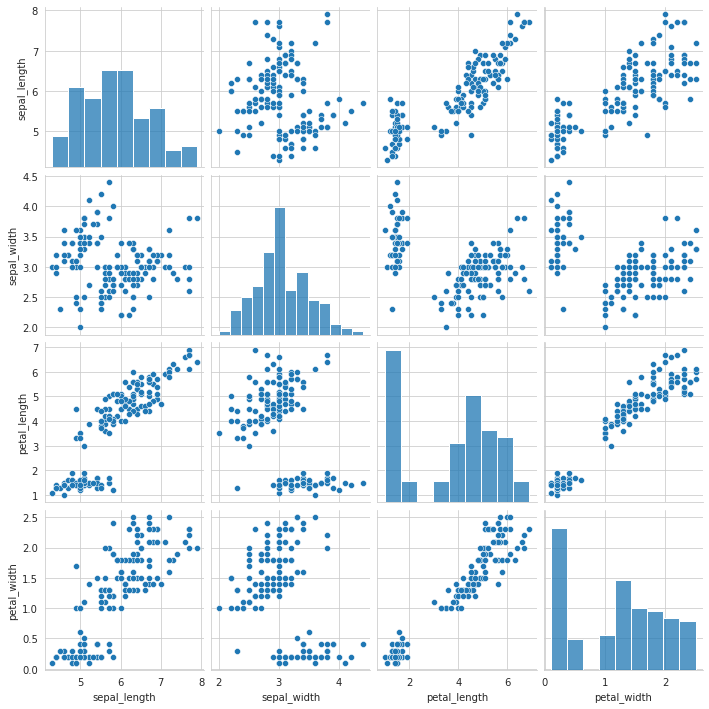

In [14]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** Os 4 atributos (sepal length, sepal width, petal length, petal width) podem contribuir para uma clusterização. Se olharmos para o petal width, podemos ver gurpos com:


*   Baixo petal length e baixo petal width;
*   Alto petal length e alto petal width.



## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [15]:
# resposta da questão 2.1
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

### **2.2. Variáveis numéricas** 

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [16]:
# resposta da questão 2.2
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **2.3. Limpeza** 

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [17]:
# resposta da questão 2.3

## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [18]:
from sklearn.cluster import KMeans

In [19]:
# resposta da questão 3.1
wcss = []

for k in range(1,11):
  modelo = KMeans(n_clusters=k)
  modelo = modelo.fit(iris)
  wcss.append(modelo.inertia_)

### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

In [20]:
clusters = modelo.labels_
clusters = pd.DataFrame(clusters, columns=['Cluster'])
iris_clustered = pd.concat([iris, clusters], axis=1)
iris_clustered.tail()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
145,6.7,3.0,5.2,2.3,5
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,5
148,6.2,3.4,5.4,2.3,5
149,5.9,3.0,5.1,1.8,0


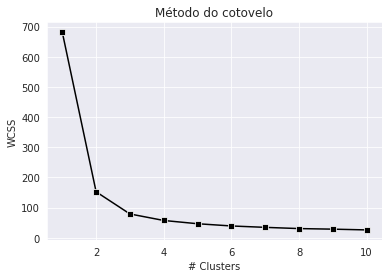

In [21]:
# resposta da questão 3.2
with sns.axes_style('darkgrid'):
  grafico = sns.lineplot(x=range(1,11), y=wcss, marker='s', color='k')
  grafico.set(title='Método do cotovelo', xlabel='# Clusters', ylabel='WCSS')



*   **2 clusters**



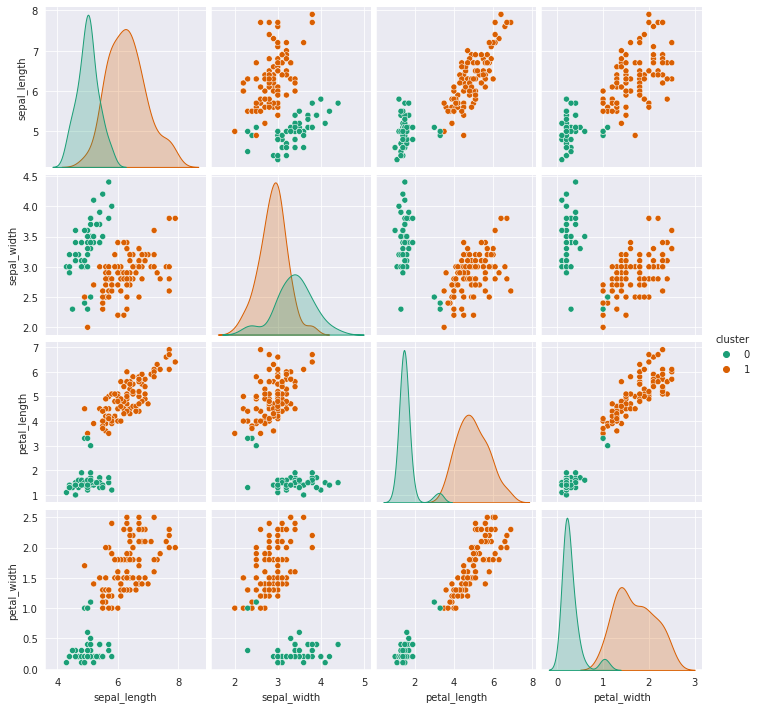

In [22]:
modelo_2k = KMeans(n_clusters=2)
modelo_2k = modelo_2k.fit(iris)

clusters = modelo_2k.labels_
iris_clustered_2k = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('darkgrid'):

  grafico = sns.pairplot(data=iris_clustered_2k, hue='cluster', palette="Dark2")



*   **3 clusters**


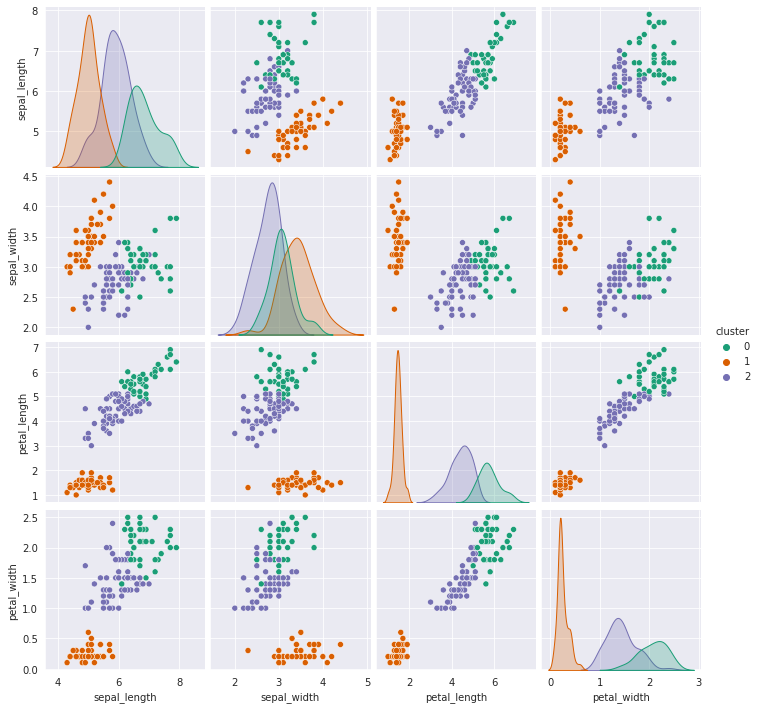

In [23]:
modelo_3k = KMeans(n_clusters=3)
modelo_3k = modelo_3k.fit(iris)

clusters = modelo_3k.labels_
iris_clustered_3k = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('darkgrid'):

  grafico = sns.pairplot(data=iris_clustered_3k, hue='cluster', palette="Dark2")



*   **4 clusters**



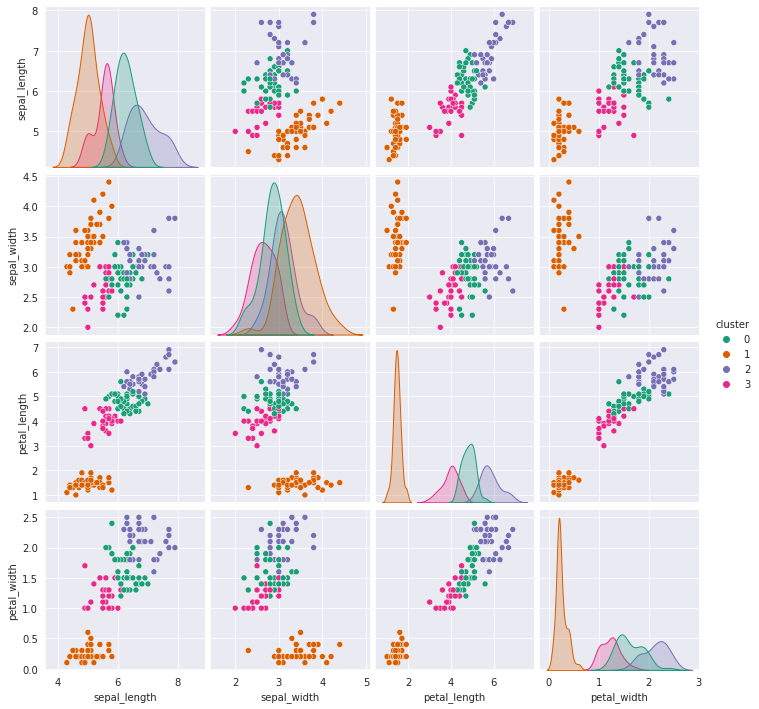

In [24]:
modelo_4k = KMeans(n_clusters=4)
modelo_4k = modelo_4k.fit(iris)

clusters = modelo_4k.labels_
iris_clustered_4k = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('darkgrid'):

  grafico = sns.pairplot(data=iris_clustered_4k, hue='cluster', palette="Dark2")

> **Comentário**: o modelo com 3 clusters soa interessante pois consegue dividir razoavelmente as flores em três grupos quanto aos atributos petal length e petal width.



### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [25]:
# resposta da questão 3.3.a
modelo = KMeans(n_clusters=3)
modelo = modelo_3k.fit(iris)

clusters = modelo.labels_
iris_clustered = pd.concat([iris, pd.DataFrame(clusters, columns=['Cluster'])], axis=1)
iris_clustered.tail()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0
149,5.9,3.0,5.1,1.8,2


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

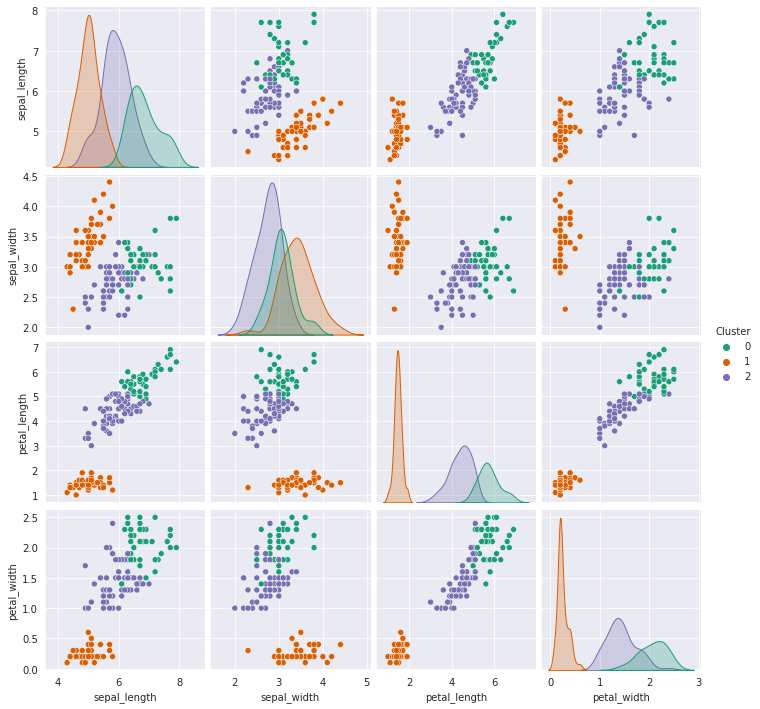

In [26]:
# resposta da questão 3.3.b
with sns.axes_style('darkgrid'):
  grafico = sns.pairplot(data = iris_clustered,
                         hue = 'Cluster',
                         palette = 'Dark2')

**Comentário:** Podemos notar o cluster 1 possui menor valor para o petal width que os demais e o seu sepal width está mais distribuído entre 3-4 mm. Os clusters 0 e 2 apesentam maior petal width e vão se diferenciar quanto ao petal legnth. Em outras palavras, flores do cluster 2 apresentam maior petal length que as do cluster 0 (um valor de corte parece estar em 5 mm de petal length).

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [27]:
iris_clustered.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [28]:
# resposta da questão 4.1
nova_flor = np.array([5.1, 3.5, 1.4, 0.2])
cluster_nova_flor = modelo.predict(nova_flor.reshape(1, -1))
print(f'Cluster da nova flor: {cluster_nova_flor}')

Cluster da nova flor: [1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


**Comentário**: a nova flor pertence ao cluster 1, isto é, ela possui menor valor para o petal width que os demais e o seu sepal width está mais distribuído entre 3-4 mm.

---